In [1]:
# important is dataloader and torchDataset

# Datasets with PyTorch
In this section we'll show how to:
* load data from outside files
* build random batches using PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>data</tt></strong></a> utilities<br>

At the end we'll briefly mention <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>.

## Perform standard imports

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data from files
We've seen how to load NumPy arrays into PyTorch, and anyone familiar with <tt>pandas.read_csv()</tt> can use it to prepare data before forming tensors. Here we'll load the <a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>iris flower dataset</a> saved as a .csv file.

In [ ]:
df = pd.read_csv('iris.csv')
#df = pd.read_csv('../Data/iris.csv')

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df.shape

(150, 5)

## Plot the data

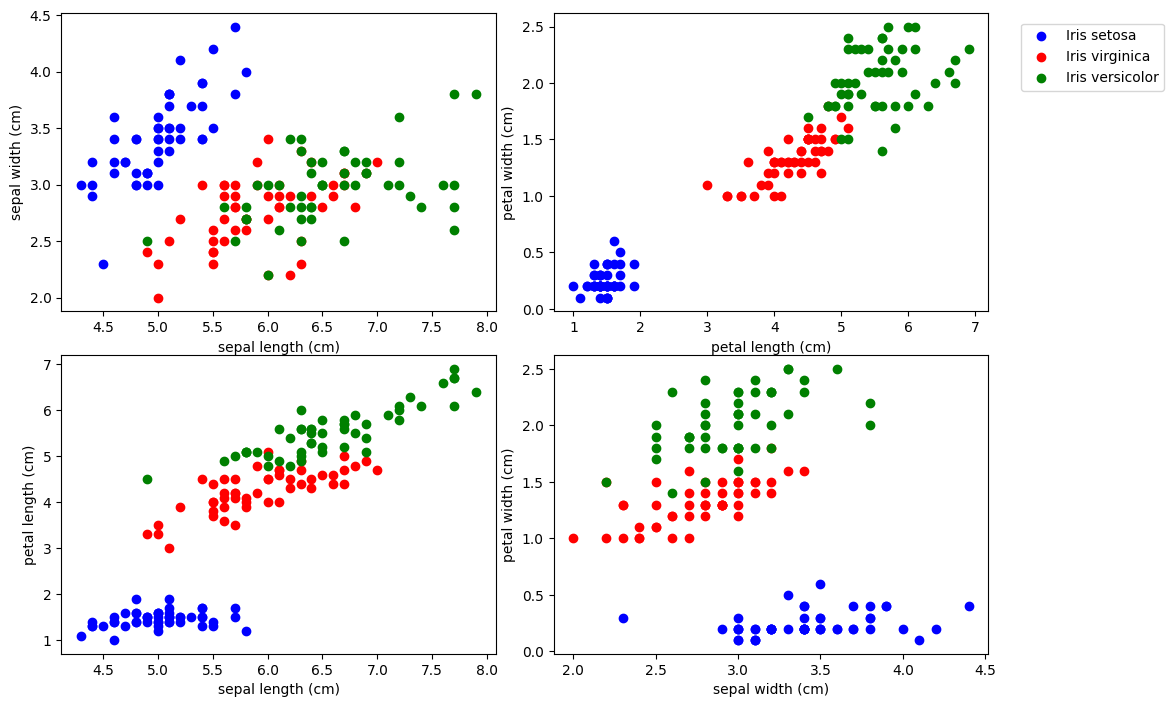

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [ ]:
list(axes.flat)

[<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
 <Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>,
 <Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
 <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>]

The iris dataset consists of 50 samples each from three species of Iris (<em>Iris setosa</em>, <em>Iris virginica</em> and <em>Iris versicolor</em>), for 150 total samples. We have four features (sepal length & width, petal length & width) and three unique labels:
0. <em>Iris setosa</em>
1. <em>Iris virginica</em>
2. <em>Iris versicolor</em>

### The classic method for building train/test split tensors
Before introducing PyTorch's Dataset and DataLoader classes, we'll take a quick look at the alternative.

In [ ]:
df['target'].values
#calling .values to get as a numpy array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.drop('target',axis=1).values,
                                                    df['target'].values, test_size=0.2,
                                                    random_state=33)



In [ ]:
train_y

array([1., 1., 2., 2., 2., 2., 2., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       2., 0., 0., 1., 2., 0., 1., 2., 2., 1., 1., 0., 0., 2., 0., 0., 2.,
       1., 1., 2., 2., 2., 2., 0., 0., 1., 1., 0., 1., 2., 1., 2., 0., 2.,
       0., 1., 0., 2., 1., 0., 2., 2., 0., 0., 2., 0., 0., 0., 2., 2., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 2., 0., 0., 0.,
       0., 2., 2., 0., 1., 1., 2., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       2., 2., 2., 1., 2., 0., 1., 0., 0., 0., 2., 1., 2., 1., 2., 1., 2.,
       0.])

In [ ]:
train_X

array([[5.6, 2.7, 4.2, 1.3],
       [6.7, 3.1, 4.7, 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 3.1, 5.6, 2.4],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5. , 2.3, 3.3, 1. ],
       [4.9, 3.1, 1.5, 0.1],
       [6.3, 2.3, 4.4, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.2, 2.9, 4.3, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3.4, 1.6, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.4, 1.5, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [5.8, 2.8, 5.1, 2.4],
       [7.7, 2.6, 6.9, 2.3],
       [5.5, 2.5, 4. , 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [4.4, 2.9, 1.4, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6. , 3

In [ ]:
torch.LongTensor(train_y)

tensor([1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1,
        2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1,
        2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0])

In [ ]:
torch.LongTensor(train_y).shape

torch.Size([120])

In [ ]:
X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.LongTensor(train_y).reshape(-1, 1) # shoudl reshape as it looks like [120] instead of [120,1]
y_test = torch.LongTensor(test_y).reshape(-1, 1)

In [ ]:
y_train

tensor([[1],
        [1],
        [2],
        [2],
        [2],
        [2],
        [2],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [2],
        [0],
        [0],
        [1],
        [2],
        [0],
        [1],
        [2],
        [2],
        [1],
        [1],
        [0],
        [0],
        [2],
        [0],
        [0],
        [2],
        [1],
        [1],
        [2],
        [2],
        [2],
        [2],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [2],
        [1],
        [2],
        [0],
        [2],
        [0],
        [1],
        [0],
        [2],
        [1],
        [0],
        [2],
        [2],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [2],
        [2],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],

In [ ]:
y_train.reshape(120)

tensor([1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1,
        2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1,
        2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0])

In [ ]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([0, 1, 2])
Counts: tensor([42, 42, 36])


<div class="alert alert-success"><strong>NOTE: </strong>The importance of a balanced training set is discussed in <em>A systematic study of the class imbalance problem in convolutional neural networks</em> by Mateusz Buda, Atsuto Maki, Maciej A. Mazurowski (10/15/17, latest rev 10/13/18) <a href='https://arxiv.org/abs/1710.05381'>https://arxiv.org/abs/1710.05381</a><br>For example, the authors show that oversampling a less common class so that it matches the more common classes is always the preferred choice.</div>

In [ ]:
X_train.size()

torch.Size([120, 4])

In [ ]:
y_train.size()

torch.Size([120, 1])

<div class="alert alert-info"><strong>NOTE: </strong>It's up to us to remember which columns correspond to which features.</div>
### Important








## Using PyTorch's Dataset and DataLoader classes
A far better alternative is to leverage PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>Dataset</tt></strong></a> and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><strong><tt>DataLoader</strong></tt></a> classes.

Usually, to set up a Dataset specific to our investigation we would define our own custom class that inherits from <tt>torch.utils.data.Dataset</tt> (we'll do this in the CNN section). For now, we can use the built-in <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset'><strong><tt>TensorDataset</tt></strong></a> class.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('target',axis=1).values
labels = df['target'].values

iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [ ]:
len(iris)

150

In [ ]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [ ]:
for row in iris:
    print(row)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

Once we have a dataset we can wrap it with a DataLoader. This gives us a powerful sampler that provides single- or multi-process iterators over the dataset.

In [ ]:
iris_loader = DataLoader(iris, batch_size=50, shuffle=True)

In [ ]:
iris_loader

In [ ]:
x=3
# the range block is evaluated only once
for i in range(0,x):
  print(i)
  x=4

0
1
2


In [ ]:
#Similaryl enumerate(iris_loader) is excuted once
#and each call of enumerate(iris_loader) gives a different output


In [ ]:
list(enumerate(iris_loader))
# if u execute it multiple times each call to iris loader gives a different shuffled set
# see the starting rows they are changing each time

[(0,
  [tensor([[4.6000, 3.2000, 1.4000, 0.2000],
           [5.6000, 2.7000, 4.2000, 1.3000],
           [5.7000, 4.4000, 1.5000, 0.4000],
           [5.4000, 3.7000, 1.5000, 0.2000],
           [5.1000, 3.3000, 1.7000, 0.5000],
           [6.3000, 2.7000, 4.9000, 1.8000],
           [5.2000, 3.4000, 1.4000, 0.2000],
           [5.2000, 2.7000, 3.9000, 1.4000],
           [6.5000, 2.8000, 4.6000, 1.5000],
           [5.8000, 2.7000, 5.1000, 1.9000],
           [6.3000, 2.5000, 4.9000, 1.5000],
           [4.5000, 2.3000, 1.3000, 0.3000],
           [5.0000, 3.2000, 1.2000, 0.2000],
           [7.4000, 2.8000, 6.1000, 1.9000],
           [5.4000, 3.4000, 1.7000, 0.2000],
           [4.4000, 3.2000, 1.3000, 0.2000],
           [5.0000, 2.0000, 3.5000, 1.0000],
           [6.0000, 2.7000, 5.1000, 1.6000],
           [7.1000, 3.0000, 5.9000, 2.1000],
           [5.0000, 3.5000, 1.3000, 0.3000],
           [6.3000, 3.3000, 6.0000, 2.5000],
           [5.5000, 2.5000, 4.0000, 1.3000],
     

In [ ]:
k=list(iris_loader)[0][1]
k

tensor([0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0,
        1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1,
        2, 2])

In [ ]:
np.unique(k.detach().numpy(), return_counts=True)

(array([0, 1, 2]), array([11, 17, 22]))

In [ ]:
k.bincount()

tensor([11, 17, 22])

In [ ]:
list(iris_loader)[0][1].bincount() # #as shuffle is set to true iris_loader = DataLoader(iris, batch_size=50, shuffle=True)
# each call gives the shuffled data


tensor([22, 16, 12])

In [ ]:
for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched)

# each batch has the x value and y values

0 [tensor([[6.7000, 3.1000, 5.6000, 2.4000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [5.5000, 2.3000, 4.0000, 1.3000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [6.5000, 3.2000, 5.1000, 2.0000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [7.7000, 2.6000, 6.9000

In [ ]:
list(iris_loader)[0][1]

tensor([0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1,
        2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1,
        0, 1])

In [ ]:
len(list(iris_loader)[0][1]) # 1st batch has 105 samples

50

In [ ]:
len(list(iris_loader)[1][1]) # 2nd batch has 45 samples

50

In [ ]:
list(iris_loader)[0][1].bincount()

tensor([17, 13, 20])

In [ ]:
len((next(iter(iris_loader)))[1])

50

## A Quick Note on Torchvision
PyTorch offers another powerful dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>, which is useful when working with image data. We'll go into a lot more detail in the Convolutional Neural Network (CNN) section. For now, just know that torchvision offers built-in image datasets like <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a> and <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a>, as well as tools for transforming images into tensors.